tutoriel : https://www.kaggle.com/code/satoru90/music-genre-classification-xgb-deep-learning

In [1]:
# imoprt libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob # allows us to list all files to a directory
import IPython
import IPython.display as ipd # to play the Audio Files

import librosa # main package for working with Audio Data
import librosa.display

# How to read the Audio Files

In [ ]:
# audio_files = glob("./Data/genres_original/*/*.wav")

## How to listen to the Audio Files

In [ ]:
ipd.Audio(audio_files[0])

## How to load the Audio Files

In [ ]:
# load the audio file and show raw data and sample rate
y, sr = librosa.load(audio_files[0])
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

## How to plot the Audio files

In [ ]:
pd.Series(y).plot(figsize=(10,5), title="Raw Audio Example", color='blue');

In [ ]:
plt.figure(figsize=(10,5))
librosa.display.waveshow(y, color = "Green")
plt.show()

In [ ]:
# Use STFT on raw audio data
D = librosa.stft(y)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

## Plotting Audio File as a Spectogram

In [ ]:
# plot transformed data as spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

## Create a Mel Spectrogram (Melodic Spectogram)

In [ ]:
# apply mel spectogram without STFT
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2)
print("Shape of Mel Spectogram", S.shape)
# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

In [ ]:
# plot the mel spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

# EDA - Exploratory Data Analysis

In [2]:
df = pd.read_csv("./dataset/features_3_sec.csv")

In [3]:
df.head() # first 5 entries

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
df.shape # see the shape of df

(9990, 60)

In [5]:
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [6]:
df.isnull().sum() # checking for missing values

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

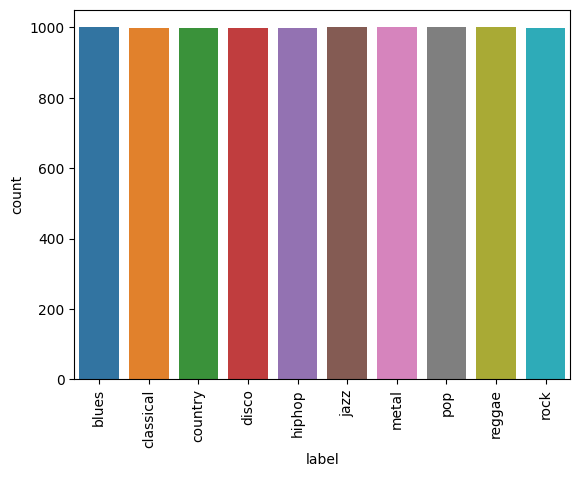

In [7]:
sns.countplot(x=df.label) # plot the categories
plt.xticks(rotation=90);

## Data Preproccesing

In [8]:
# drop filename column and show new df first 5 entries
df = df.drop(labels='filename',axis=1)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [9]:
# import labelencoder and scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [10]:
data = df.iloc[:, :-1] # get the other columns
columns_to_remove = ['perceptr_mean', 'perceptr_var', 'length']
data = data.drop(columns=columns_to_remove)
data.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'tempo', 'mfcc1_mean', 'mfcc1_var',
       'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean',
       'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
       'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean',
       'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var',
       'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean',
       'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
       'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean',
       'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

In [11]:
labels = df.iloc[:, -1] # get labels column
labels.to_frame()

,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


## Getting x and y ready

In [12]:
 # assign x and y, scale x and encode y
print(data)
x = np.array(data, dtype = float)
x = scaler.fit_transform(data)
y = encoder.fit_transform(labels)
x.shape, y.shape

      chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0             0.335406         0.091048  0.130405  0.003521   
1             0.343065         0.086147  0.112699  0.001450   
2             0.346815         0.092243  0.132003  0.004620   
3             0.363639         0.086856  0.132565  0.002448   
4             0.335579         0.088129  0.143289  0.001701   
...                ...              ...       ...       ...   
9985          0.349126         0.080515  0.050019  0.000097   
9986          0.372564         0.082626  0.057897  0.000088   
9987          0.347481         0.089019  0.052403  0.000701   
9988          0.387527         0.084815  0.066430  0.000320   
9989          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              1972.744388   
1                1816.693777           90525.690866              2010.051501   
2  

((9990, 55), (9990,))

In [13]:
# split data to train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((7992, 55), (1998, 55), (7992,), (1998,))

## Modeling

In [14]:
# import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

2023-08-09 15:55:39.342684: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-09 15:55:39.344763: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 15:55:39.375205: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 15:55:39.375821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 15:55:40.136820: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [15]:
# build model
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
    
])

2023-08-09 15:55:41.833324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-09 15:55:41.833931: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
print(model.summary()) # show summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               28672     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [32]:
# compile model  
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [33]:
# fit model - training
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=128)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=128)

Epoch 1/300
63/63 [==============================] - 1s 6ms/step - loss: 0.0260 - accuracy: 0.9931 - val_loss: 0.4594 - val_accuracy: 0.9214
Epoch 2/300
63/63 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9905 - val_loss: 0.5278 - val_accuracy: 0.9214
Epoch 3/300
63/63 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9902 - val_loss: 0.4668 - val_accuracy: 0.9209
Epoch 4/300
63/63 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.4966 - val_accuracy: 0.9179
Epoch 5/300
63/63 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.4708 - val_accuracy: 0.9239
Epoch 6/300
63/63 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.4266 - val_accuracy: 0.9264
Epoch 7/300
63/63 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.4267 - val_accuracy: 0.9284
Epoch 8/300
6

In [34]:
# evaluate model
_, accuracy = model.evaluate(x_test, y_test, batch_size=128)

 1/16 [>.............................] - ETA: 0s - loss: 0.6158 - accuracy: 0.9453

16/16 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.9309


In [35]:
print("Accuracy:",accuracy) # print accuracy

Accuracy: 0.9309309124946594


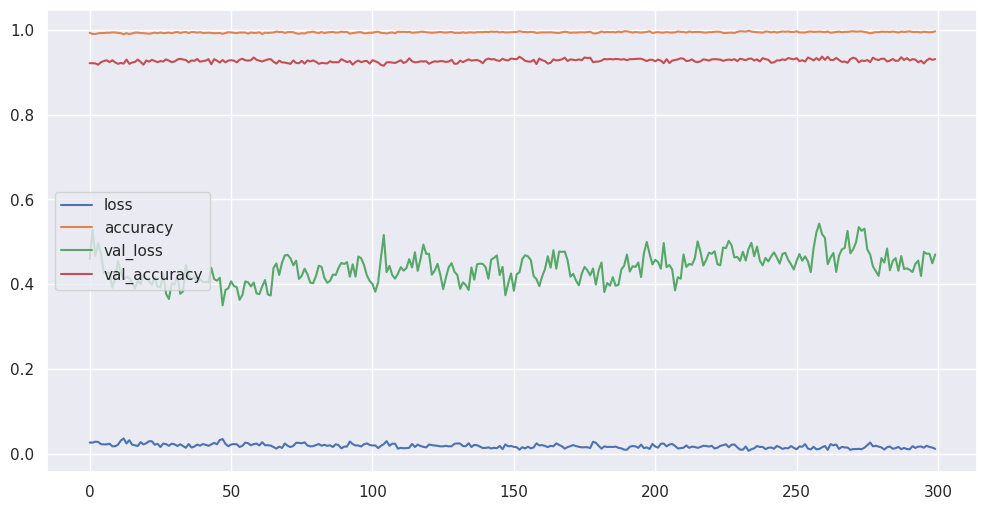

In [36]:
# Plot results
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

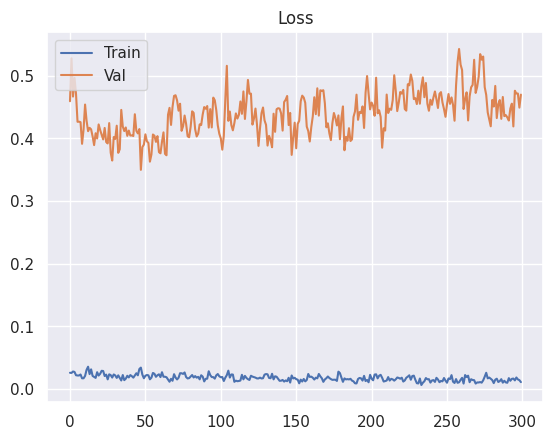

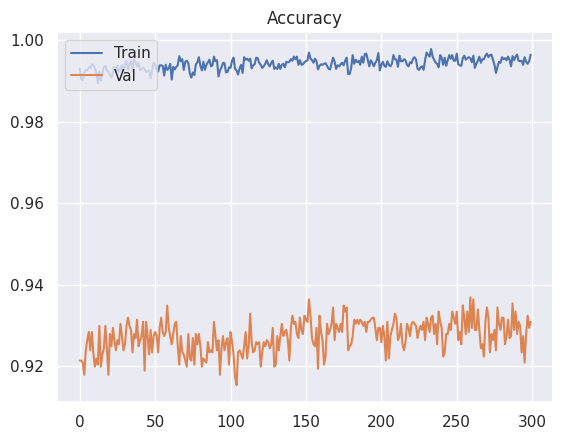

In [37]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [39]:
model.save("models/model_with_deep_learning_91_acc_no_perceptr_2.hdf5")

/home/lucas/Work/Simplon/music-classification/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import os 

# Définissons la liste avec les genres :
genres = ['blues', 'classical', 'country', 'disco', 'hiphop','jazz', 'metal', 'pop', 'reggae', 'rock']

# Création d'un dictionnaire avec les genres vide :

audio_files = {}


for g in genres:
  audio_files[g] = []

# Remplissage du dictionnaire en important les fichiers audio avec Librosa :

for g in genres:
  for audio in os.listdir(f'./dataset/genres_original/{g}'):
    audio_files[g].append(librosa.load(f'./dataset/genres_original/{g}/{audio}')[0])

In [25]:
def audio_pipeline(audio):


  features = []

  # Calcul du ZCR
  
  chroma_stft = librosa.feature.chroma_stft(y=audio)
  features.append(np.mean(chroma_stft))
  features.append(np.var(chroma_stft))
  
  rms = librosa.feature.rms(y=audio)
  features.append(np.mean(rms))
  features.append(np.var(rms))
  
  # Calcul de la moyenne du Spectral centroid
  
  # spectral_centroids = librosa.feature.spectral_centroid(y=audio)[0]
  spectral_centroids = librosa.feature.spectral_centroid(y=audio)
  features.append(np.mean(spectral_centroids))
  features.append(np.var(spectral_centroids))

  spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio)
  features.append(np.mean(spectral_bandwidth))
  features.append(np.var(spectral_bandwidth))

  rolloff = librosa.feature.spectral_rolloff(y=audio)
  features.append(np.mean(rolloff))
  features.append(np.var(rolloff))

  zcr = librosa.feature.zero_crossing_rate(y=audio)
  features.append(np.mean(zcr))
  features.append(np.var(zcr))
  
  harmony = librosa.effects.harmonic(y=audio)
  features.append(np.mean(harmony))
  features.append(np.var(harmony))
  
  tempo = librosa.feature.tempo(y=audio)
  features.append(tempo[0])

  # Calcul des moyennes des MFCC

  mfcc = librosa.feature.mfcc(y=audio)

  for x in mfcc:
    features.append(np.mean(x))
    features.append(np.var(x))


  return features

In [26]:
# column_names = ['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var', 
#             'spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean',
#             'spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean',
#             'zero_crossing_rate_var','harmony_mean','harmony_var', 'tempo',
#             'mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var',
#             'mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean',
#             'mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var',
#             'mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var',
#             'mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var',
#             'mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var',
#             'mfcc20_mean','mfcc20_var', 'label']


# # Création d'un dataframe vide

# df = pd.DataFrame(columns = column_names)

# # On itère sur les audios pour remplir le dataframe

# i = 0
# for g in genres:
#   for music in audio_files[g]:
#     # audio_pipeline(music)+[g]
#     # break
#     df.loc[i] = audio_pipeline(music)+[g]
#     i+=1

In [27]:
df_test = pd.read_csv("./music4.csv")
labels = df_test.iloc[:, -1] # get labels column
df_test = df_test.iloc[:, :-1]

In [40]:
import joblib
 # assign x and y, scale x and encode y
x_t = np.array(df_test, dtype = float)
x_t = scaler.fit_transform(df_test)
y_t = encoder.fit_transform(labels)
joblib.dump(scaler, "scaler1.pkl")

x_t.shape, y_t.shape

((29, 55), (29,))

In [29]:
prediction = model.predict(x_t)

1/1 [==============================] - 0s 61ms/step


In [30]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop','jazz', 'metal', 'pop', 'reggae', 'rock']

probs = np.exp(prediction) / np.sum(np.exp(prediction), axis=1, keepdims=True)

predicted_classes = np.argmax(probs, axis=1)
predicted_class_names = [genres[class_index] for class_index in predicted_classes]

for i in range(len(predicted_class_names)):
    print(f"Prédiction pour la musique {i + 1}: {predicted_class_names[i]}")

Prédiction pour la musique 1: blues
Prédiction pour la musique 2: blues
Prédiction pour la musique 3: blues
Prédiction pour la musique 4: classical
Prédiction pour la musique 5: classical
Prédiction pour la musique 6: classical
Prédiction pour la musique 7: country
Prédiction pour la musique 8: country
Prédiction pour la musique 9: country
Prédiction pour la musique 10: disco
Prédiction pour la musique 11: disco
Prédiction pour la musique 12: disco
Prédiction pour la musique 13: hiphop
Prédiction pour la musique 14: hiphop
Prédiction pour la musique 15: hiphop
Prédiction pour la musique 16: jazz
Prédiction pour la musique 17: jazz
Prédiction pour la musique 18: metal
Prédiction pour la musique 19: metal
Prédiction pour la musique 20: metal
Prédiction pour la musique 21: pop
Prédiction pour la musique 22: pop
Prédiction pour la musique 23: pop
Prédiction pour la musique 24: reggae
Prédiction pour la musique 25: reggae
Prédiction pour la musique 26: reggae
Prédiction pour la musique 27: 

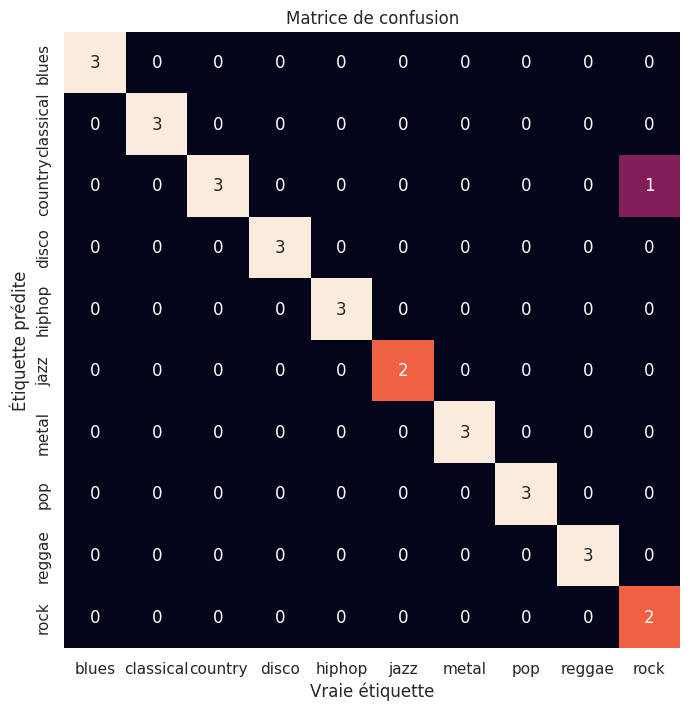

In [31]:
from sklearn.metrics import confusion_matrix
sns.set()
mat = confusion_matrix(y_t, np.argmax(prediction, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=genres, yticklabels=genres)
plt.xlabel('Vraie étiquette')
plt.ylabel('Étiquette prédite')
plt.title('Matrice de confusion')
plt.show()